<p><font size=5 color="#210F6E"><em><u><center>Fast Data Analysis for English tweets</center></u></em></font><p>
<br>
<font face="Gill Sans" color="#261D7A" size="3.2">As we did before with #PrimaireLeDébat tweets we recovered tweets having the hashtag #Lalaland in the TwitteR_Recover repository</font><br><br>
<font color="#206B50" size = 3><center>**DATA CLEANING**</center></font>

In [138]:
yourPath = paste0(getwd(),"/data/Lalaland.csv")

tweets = read.csv(yourPath, encoding="UTF-8")
print(dim(tweets))

tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))
#head(tweets, n=5)

[1] 1000   17


In [139]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
            
    x = sapply(x, try.error)
            
    #Replace Emma by Stone 
    x = gsub("emma", "stone", x)
    
    #Delete unecessary #lalaland or lalaland       
    x = gsub('\\S+lalaland\\S+', '', x)
            
     #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    # replace apostrophes
    x = gsub("'", " ", x)

    # remove punctuation except @, #, _, -
    x = gsub("@", "AAAAAAAAAAA", x)
    x = gsub("#", "BBBBBBBBBBB", x)
    x = gsub("_", "CCCCCCCCCCC", x)
    x = gsub("-", "DDDDDDDDDDD", x)
    x = gsub("[[:punct:]]", " ", x)
    x = gsub("AAAAAAAAAAA", "@", x)
    x = gsub("BBBBBBBBBBB", "#", x)
    x = gsub("CCCCCCCCCCC", "_", x)
    x = gsub("DDDDDDDDDDD", "-", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    x = gsub("'", "", x)    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    x = gsub("  ", " ", x)
    return(x)
}
                             
tweets$text <- clean_text(tweets$text)
head(tweets)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,chance signed #lalaland mini posters ✨ tickets only ends,0,2017-02-06 13:29:23,FALSE,8.285965e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",itscarasexual,4211,TRUE,FALSE
2,happy with ending #lalaland,0,2017-02-06 13:28:19,FALSE,8.285962e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Traytini,0,FALSE,FALSE
3,liberals still #lalaland minister defence more worried about climate change come soon enough,0,2017-02-06 13:27:48,FALSE,8.285961e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",hotdogluver2,17,TRUE,FALSE
4,lucky lucky mendes about that #lalaland,0,2017-02-06 13:27:14,FALSE,8.285959e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Traytini,0,FALSE,FALSE
5,NA,0,2017-02-06 13:26:58,FALSE,8.285958e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",itscarasexual,592,TRUE,FALSE
6,laughing people bother with land because didn like fantastic #lalaland,0,2017-02-06 13:26:17,FALSE,8.285957e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Carmy98302605,0,FALSE,FALSE


In [140]:
sum(is.na(tweets$text))

[1] 258

In [141]:
tweets = na.omit(tweets)
tweets$X <- NULL
nrow(tweets)

[1] 742

In [142]:
col = tweets$text
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
top40_user_called = sort(table(unlist(mfw)), decreasing=TRUE)
head(top40_user_called, n = 40)


    @ryangosling       @eonefilms            @imax        @lalaland 
              33               17               10                8 
     @ariyowahab   @beatriceupdeg    @drafthousewb   @curtisstigers 
               3                3                3                2 
 @directorsguild        @_samtana @alexandrasavior     @annieawards 
               2                1                1                1 
          @aosny           @bafta       @ballasttv    @carcarpetach 
               1                1                1                1 
@cinemagicmexico @columbiarecords        @creators     @curtmenefee 
               1                1                1                1 
  @curzonchelsea   @davidsocomedy      @djhighborn     @doddleoddle 
               1                1                1                1 
         @ecebab  @entertainanglr  @everymancinema  @gasandelectric 
               1                1                1                1 
 @griffithobserv         @h_combs

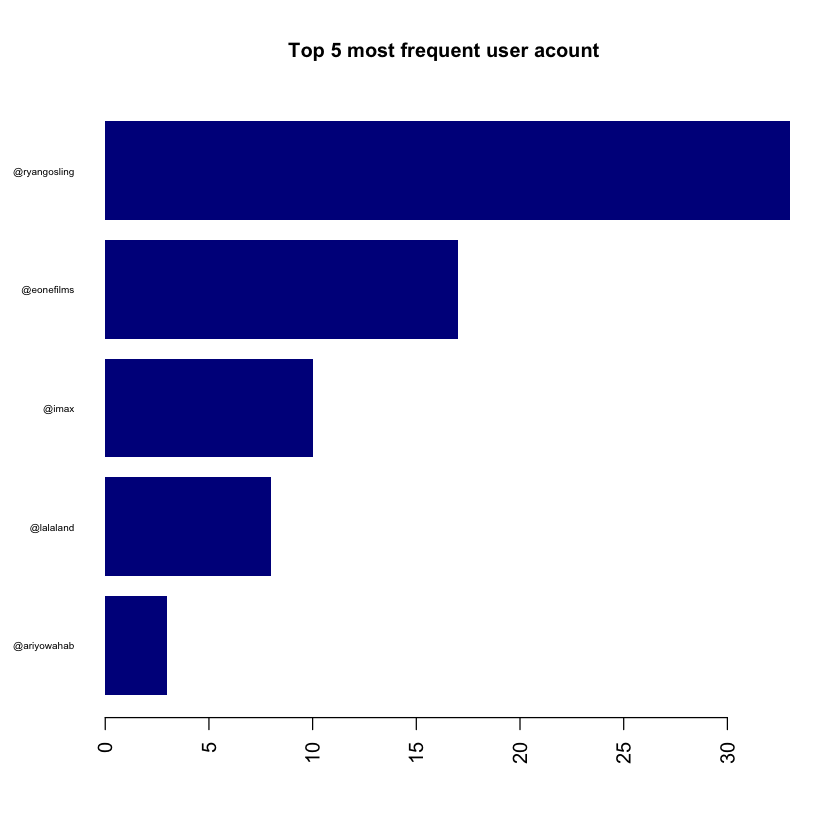

In [143]:
top5 = head(top40_user_called, n = 5)
barplot(sort(top5), border=NA, las=2, main="Top 5 most frequent user acount", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.5)

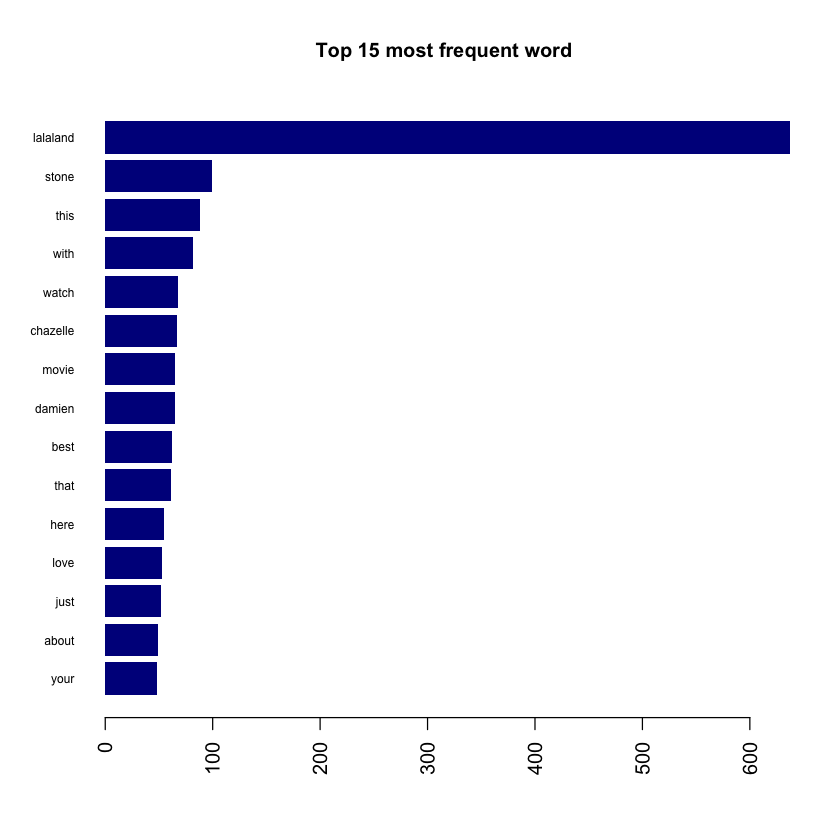

In [144]:
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)

number_Top = function(number){
  topWord = head(w, n = number)
  topWord = sort(topWord, decreasing=FALSE) 
  return(topWord)
}

top15 = number_Top(15)
barplot(top15, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.6)

<font color="#206B50" size = 3><center>**SENTIMENT ANALYSIS**</center></font>

In [145]:
#install.packages("RSentiment") #Requiered Java 
library(RSentiment)

tweets$score = 0
for (i in 1:nrow(tweets)){
 tweets$score[i] = sum(calculate_score(tweets$text[i]))   
}

head(tweets)

,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted,score
1,chance signed #lalaland mini posters ✨ tickets only ends,0,2017-02-06 13:29:23,FALSE,8.285965e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",itscarasexual,4211,TRUE,FALSE,0
2,happy with ending #lalaland,0,2017-02-06 13:28:19,FALSE,8.285962e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Traytini,0,FALSE,FALSE,1
3,liberals still #lalaland minister defence more worried about climate change come soon enough,0,2017-02-06 13:27:48,FALSE,8.285961e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",hotdogluver2,17,TRUE,FALSE,0
4,lucky lucky mendes about that #lalaland,0,2017-02-06 13:27:14,FALSE,8.285959e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Traytini,0,FALSE,FALSE,0
6,laughing people bother with land because didn like fantastic #lalaland,0,2017-02-06 13:26:17,FALSE,8.285957e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Carmy98302605,0,FALSE,FALSE,1
7,@h_combs @jimbohuff dude cannot handle anyone disagreeing with character flaw celebs they live #lalaland,0,2017-02-06 13:26:07,FALSE,8.285956e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",klorenzen81,0,FALSE,FALSE,-2


In [146]:
#install.packages("plyr")
library(plyr)

Global_Lalaland_Sentiment = calculate_total_presence_sentiment(tweets$text)
Global_Lalaland_Sentiment
Global_Lalaland_Sentiment = data.frame(t(Global_Lalaland_Sentiment))
Global_Lalaland_Sentiment = rename(Global_Lalaland_Sentiment, c("X1"="Emotions", "X2"="Score"))
Global_Lalaland_Sentiment

barplot(as.numeric(Global_Lalaland_Sentiment$Score), names = Global_Lalaland_Sentiment$Emotions, cex.names= 0.65,
  xlab = "feelings", ylab = "Number of tweets having specific emotion", col = "darkblue",
  main="Emotions in Lalaland tweets")

Sarcasm,Neutral,Negative,Positive,Very Negative,Very Positive
0,447,224,178,32,59


Emotions,Score
Sarcasm,0
Neutral,447
Negative,224
Positive,178
Very Negative,32
Very Positive,59


ERROR: Error in barplot.default(Global_Lalaland_Sentiment$Score, names = Global_Lalaland_Sentiment$Emotions, : 'height' must be a vector or a matrix


In [148]:
#install.packages("syuzhet")
library(syuzhet)

tweets$anger = 0
tweets$anticipation = 0
tweets$disgust = 0
tweets$fear = 0
tweets$joy = 0
tweets$sadness = 0
tweets$surprise = 0
tweets$trust = 0
tweets$negative = 0
tweets$positive = 0

for(i in 1:nrow(tweets)){
  if(get_nrc_sentiment(tweets$text[i])$anger > 0){
    tweets$anger[i] = 1
  }
  if(get_nrc_sentiment(tweets$text[i])$anticipation > 0){
    tweets$anticipation[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$disgust > 0){
    tweets$disgust[i] = 1
  }
  if(get_nrc_sentiment(tweets$text[i])$fear > 0){
    tweets$fear[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$joy > 0){
    tweets$joy[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$sadness > 0){
    tweets$sadness[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$surprise > 0){
    tweets$surprise[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$trust > 0){
    tweets$trust[i] = 1
  }
  if(get_nrc_sentiment(tweets$text[i])$negative > 0){
    tweets$negative[i] = 1
  } 
  if(get_nrc_sentiment(tweets$text[i])$positive > 0){
    tweets$positive[i] = 1
  } 
}

In [149]:
sum_anger = sum(tweets$anger)
sum_anticipation = sum(tweets$anticipation)
sum_disgust = sum(tweets$disgust)
sum_fear = sum(tweets$fear)
sum_joy = sum(tweets$joy)
sum_sadness = sum(tweets$sadness)
sum_surprise = sum(tweets$surprise)
sum_trust = sum(tweets$trust)
sum_negative = sum(tweets$negative)
sum_positive = sum(tweets$positive)

sum_feelings_names = c("anger", "anticipation", "disgust", 
                       "fear", "joy", "sadness", "surprise",
                      "trust", "negative", "positive")
sum_feelings = c(sum_anger, sum_anticipation, sum_disgust, 
                 sum_fear, sum_joy, sum_sadness, sum_surprise, 
                 sum_trust, sum_negative, sum_positive)

df_feelings = data.frame(sum_feelings_names, sum_feelings)
df_feelings

sum_feelings_names,sum_feelings
anger,163
anticipation,326
disgust,73
fear,173
joy,270
sadness,165
surprise,159
trust,256
negative,242
positive,398


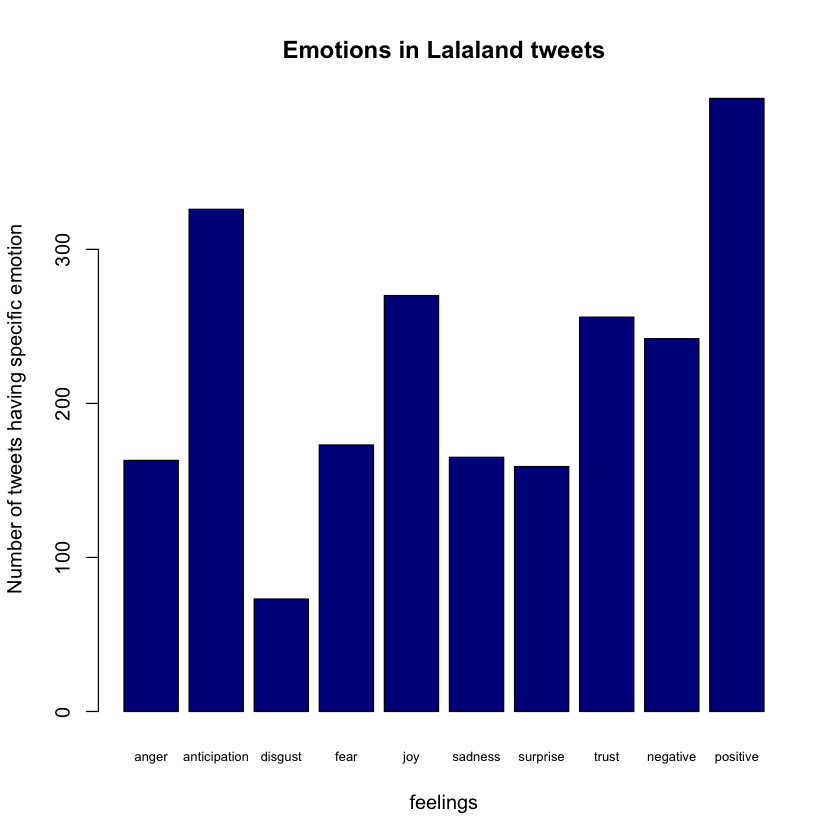

In [150]:
barplot(df_feelings$sum_feelings, names = df_feelings$sum_feelings_names, cex.names= 0.65,
  xlab = "feelings", ylab = "Number of tweets having specific emotion", col = "darkblue",
  main="Emotions in Lalaland tweets")

In [ ]:
#install.packages("wordcloud")
#install.packages("SnowballC")
library(SnowballC)
library(wordcloud)

top50 = number_Top(50)
wordcloud(names(top50), top50, min.freq=2)

In [ ]:
#require(devtools)
#install_github("lchiffon/wordcloud2")
library(wordcloud2)

top100 = number_Top(100)
cat("The letterCloud function does not work on Jupyter notebook, if you are using markdown, you can uncomment this line.")
#letterCloud(top100, word = "PS", wordSize = 1)

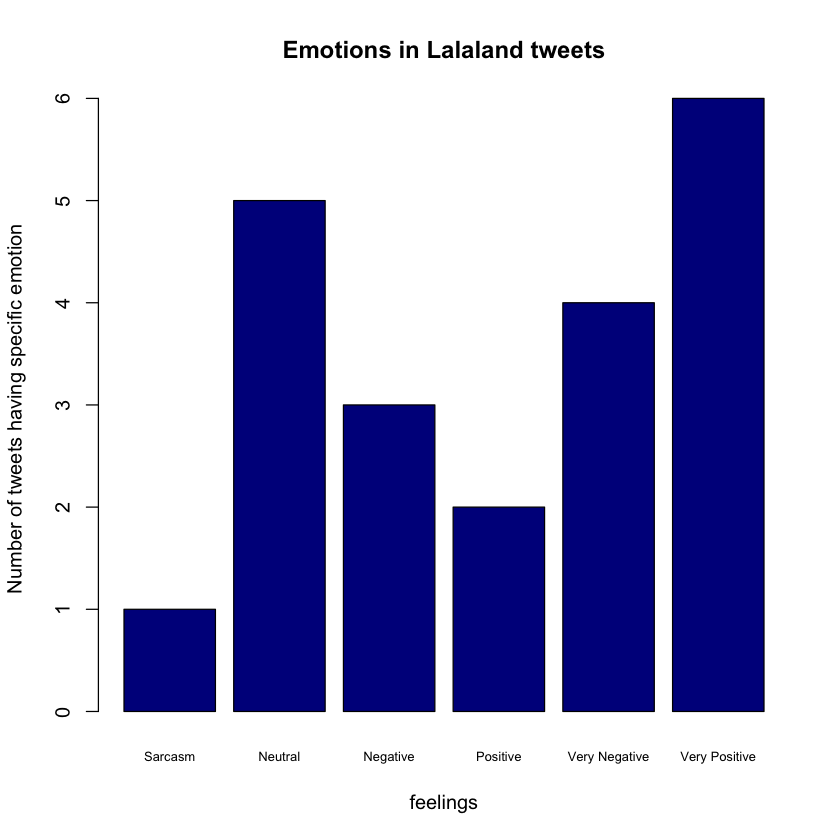

In [162]:
barplot(as.numeric(Global_Lalaland_Sentiment$Score), names = Global_Lalaland_Sentiment$Emotions, cex.names= 0.65,
  xlab = "feelings", ylab = "Number of tweets having specific emotion", col = "darkblue",
  main="Emotions in Lalaland tweets")

In [157]:
Global_Lalaland_Sentiment$Score
Global_Lalaland_Sentiment$Emotions
Score = c(0, 1, 2, 3, 4, 5)
Emotions = c("Sa", "Ne", "Na", "Po", "VeN", "VeP")

[1] 0   447 224 178 32  59 
Levels: 0 178 224 32 447 59

[1] Sarcasm       Neutral       Negative      Positive      Very Negative
[6] Very Positive
Levels: Negative Neutral Positive Sarcasm Very Negative Very Positive

In [161]:
class(as.numeric(Global_Lalaland_Sentiment$Score))

[1] "numeric"